In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import klib as k
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn .model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,Ridge,LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv("cars_dataset.csv")


In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


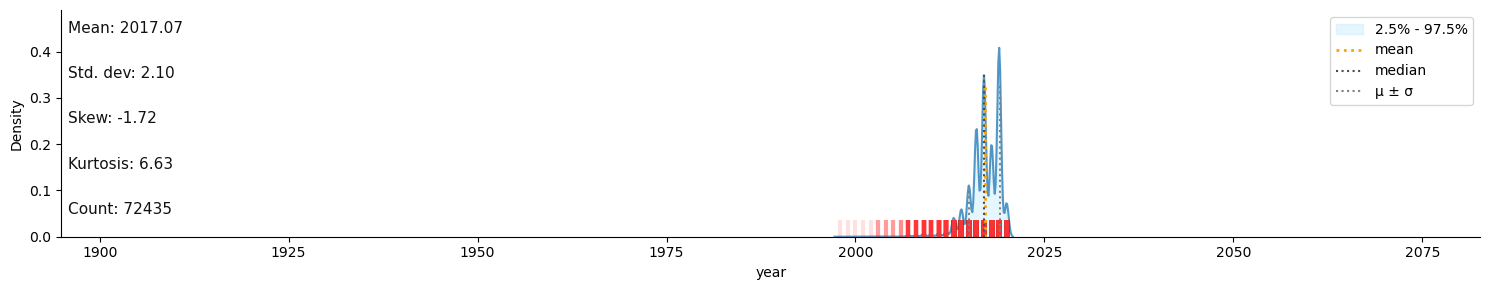

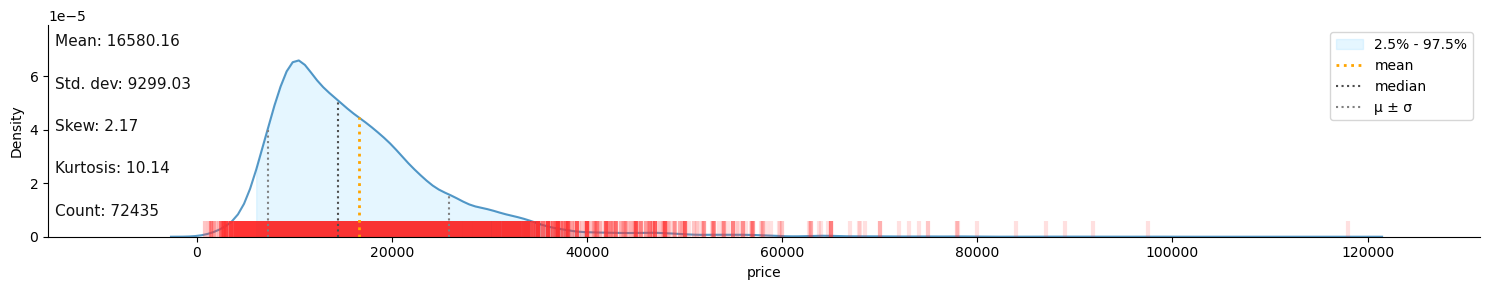

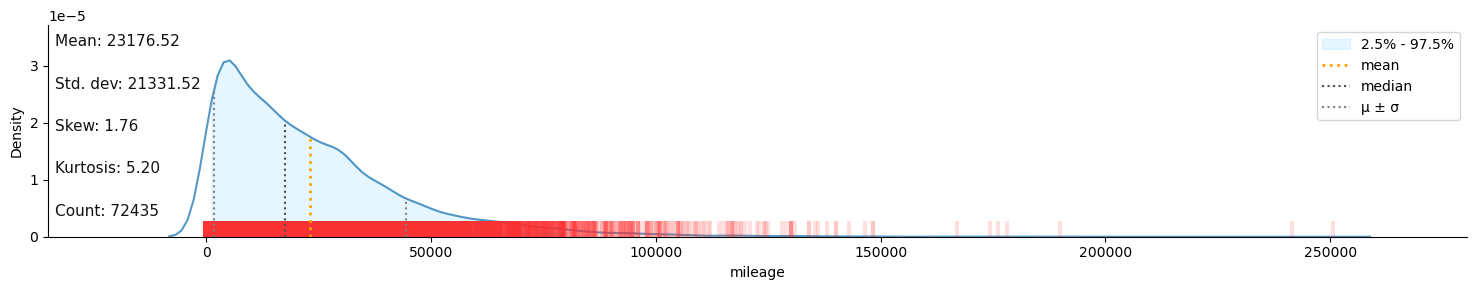

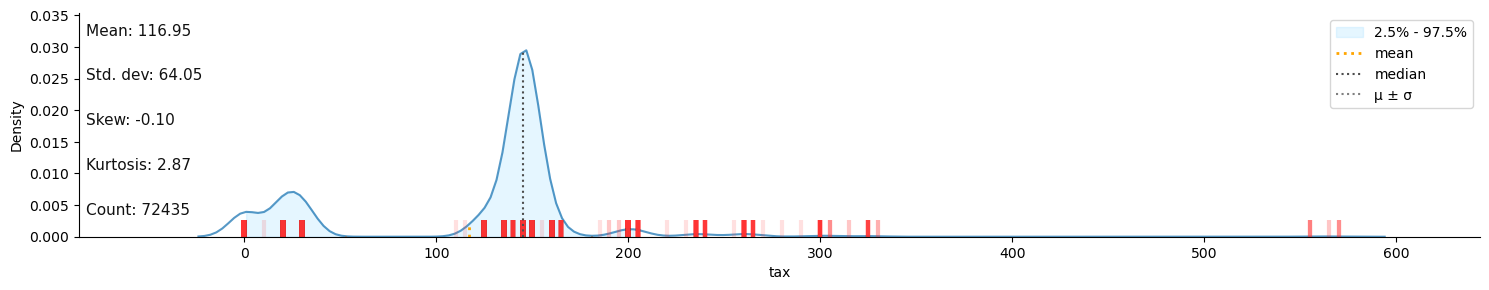

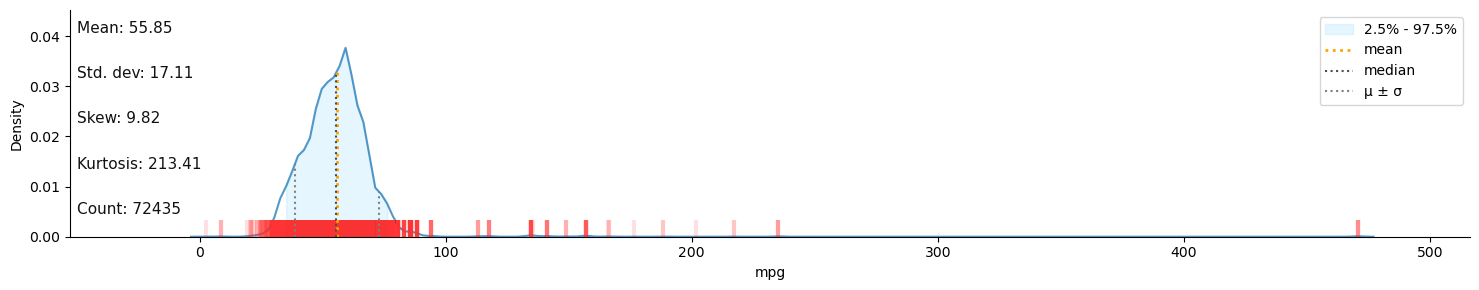

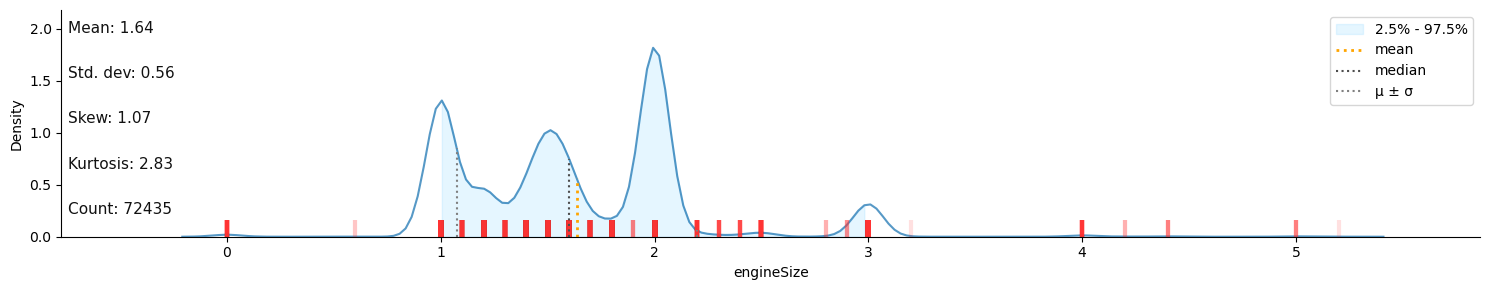

In [15]:
k.dist_plot(df);

GridSpec(6, 4)

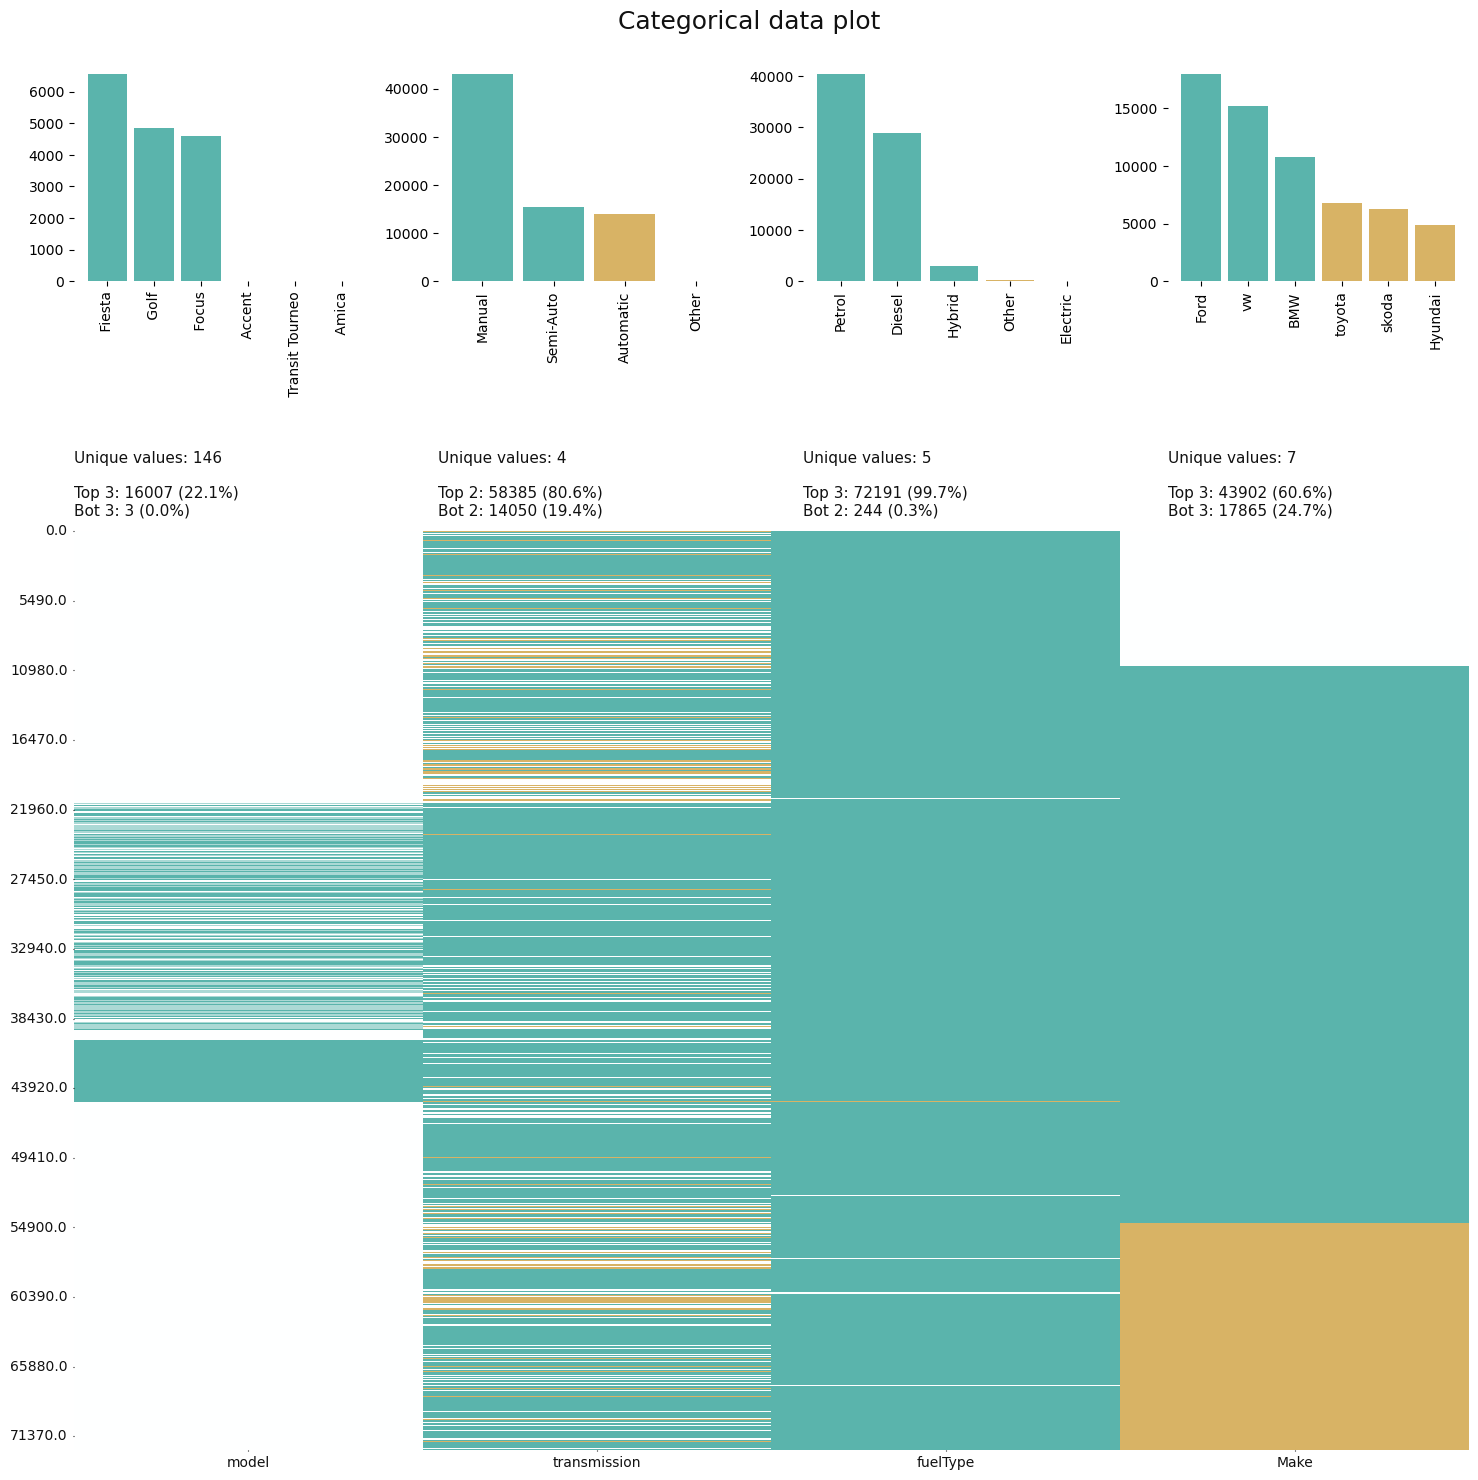

In [16]:
k.cat_plot(df)

In [17]:
k.corr_mat(df)

,year,price,mileage,tax,mpg,engineSize
year,1.00,0.52,-0.75,0.24,-0.14,-0.03
price,0.52,1.00,-0.43,0.35,-0.33,0.63
mileage,-0.75,-0.43,1.00,-0.23,0.18,0.12
tax,0.24,0.35,-0.23,1.00,-0.42,0.29
mpg,-0.14,-0.33,0.18,-0.42,1.00,-0.28
engineSize,-0.03,0.63,0.12,0.29,-0.28,1.00


In [3]:
k.clean_column_names(df)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


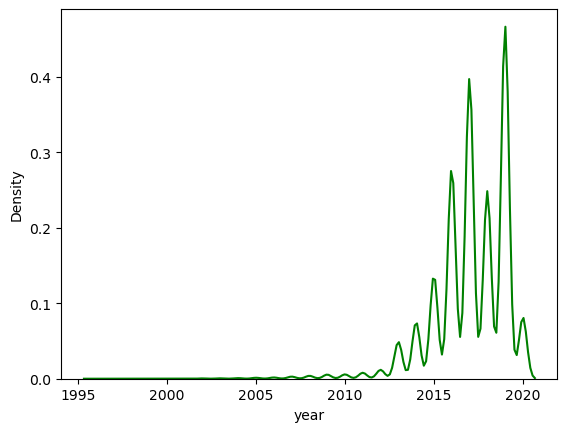

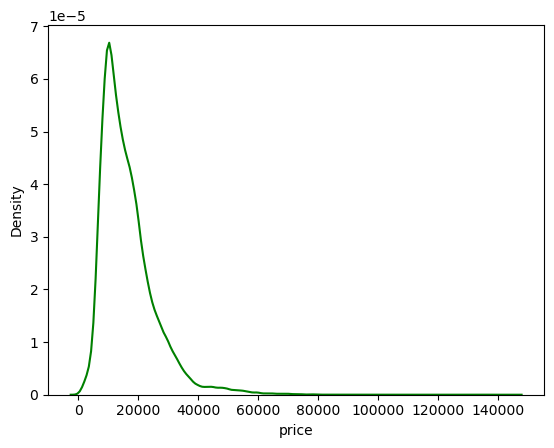

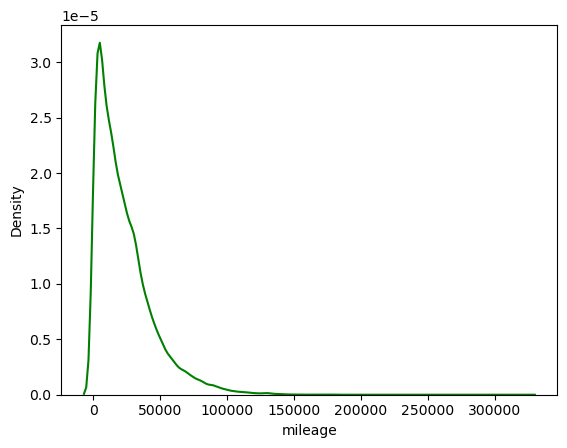

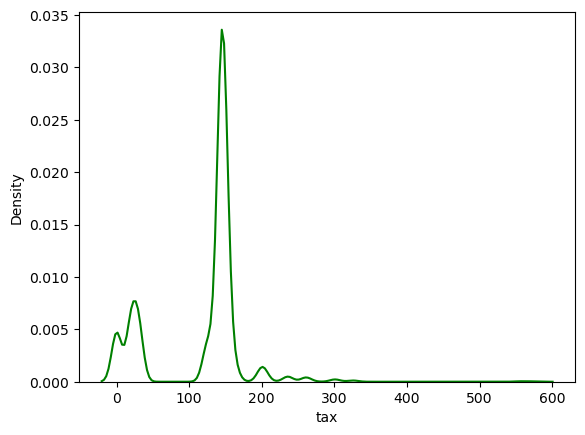

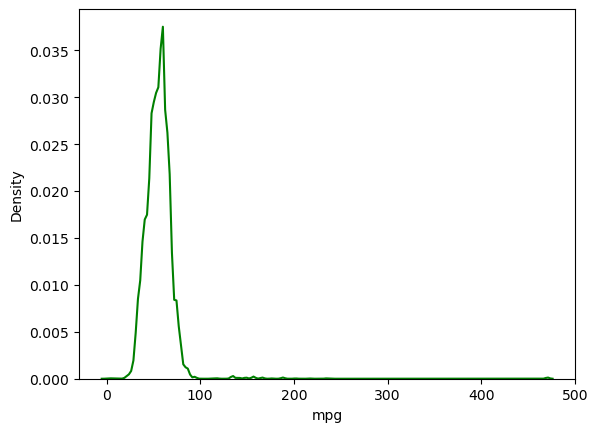

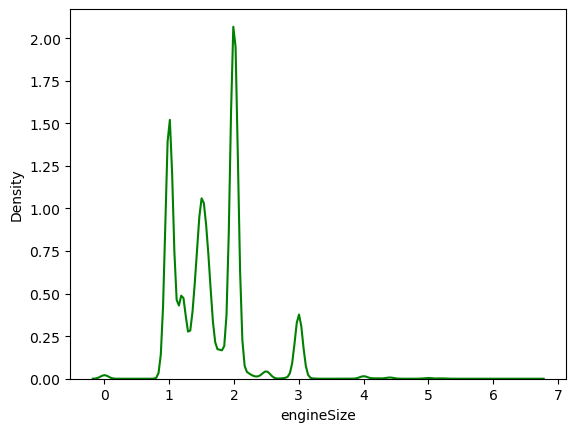

In [18]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i],color="GREEN")
        plt.show();

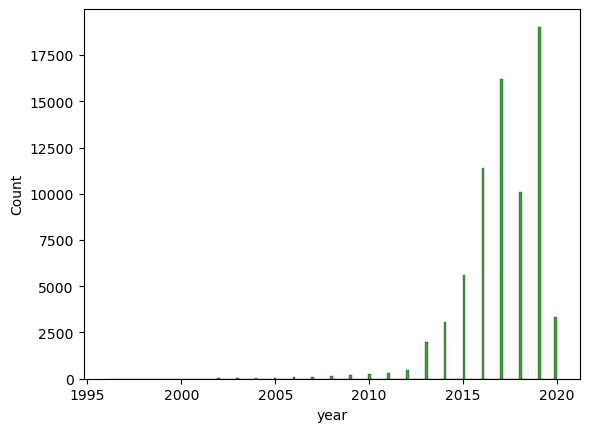

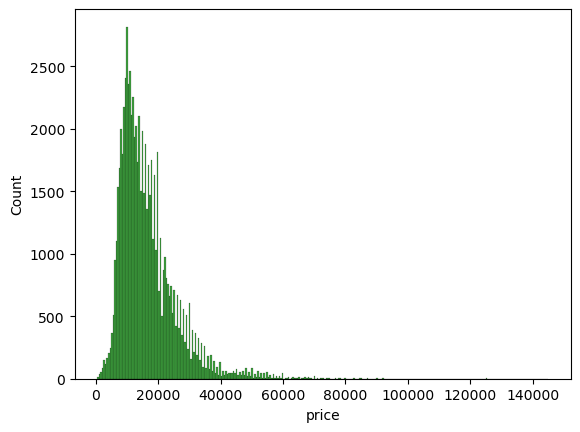

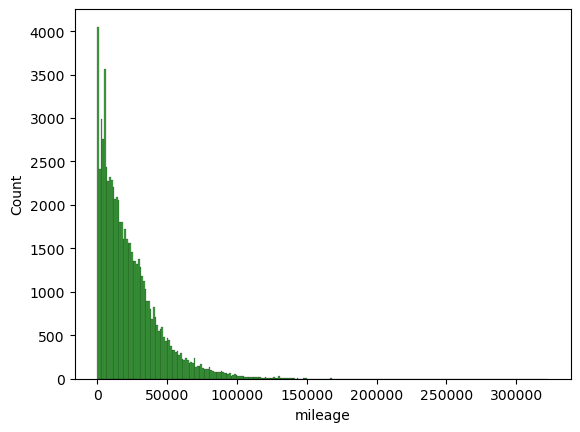

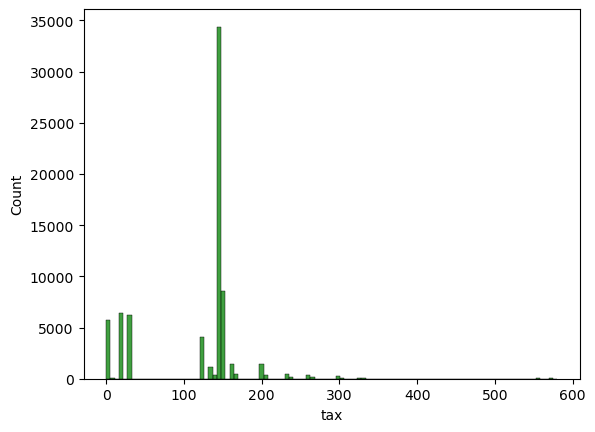

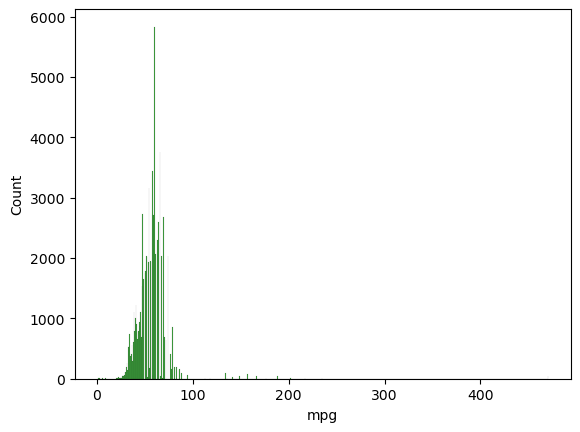

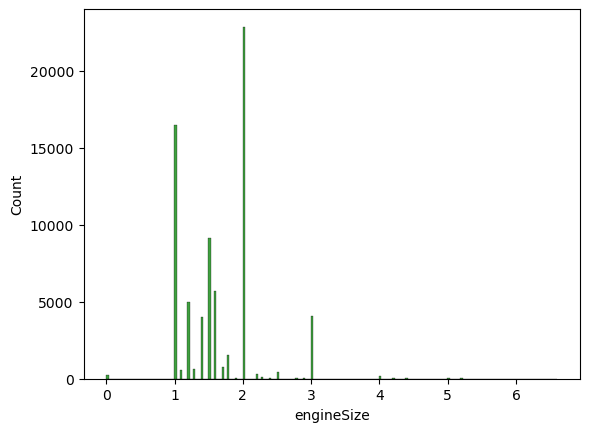

In [19]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i],color="GREEN")
        plt.show();

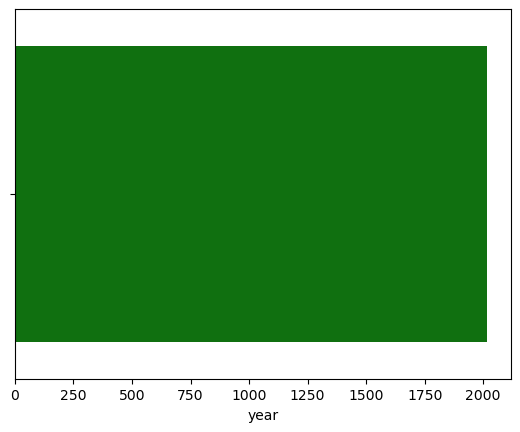

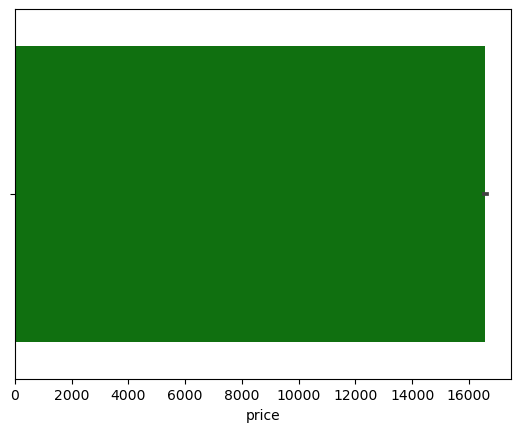

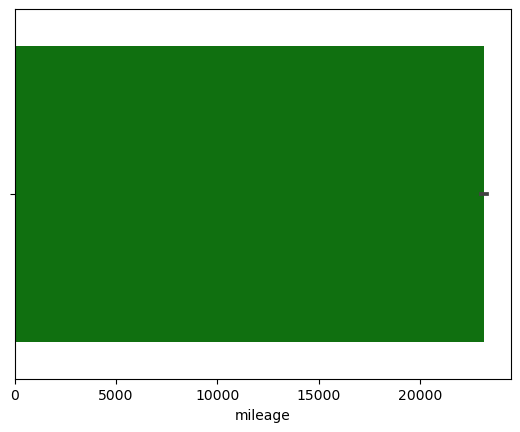

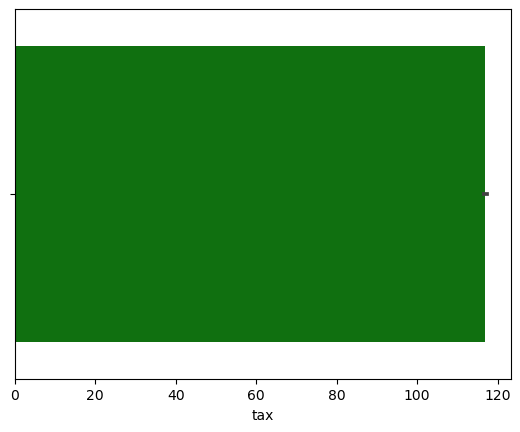

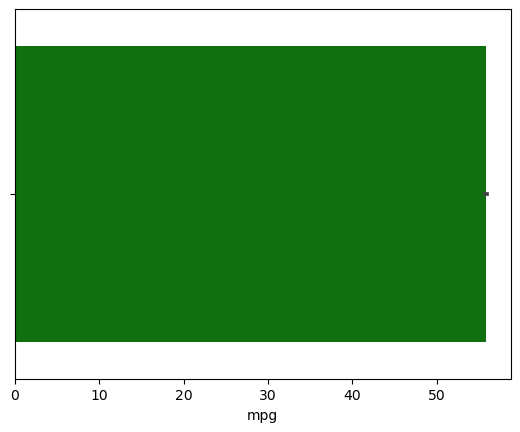

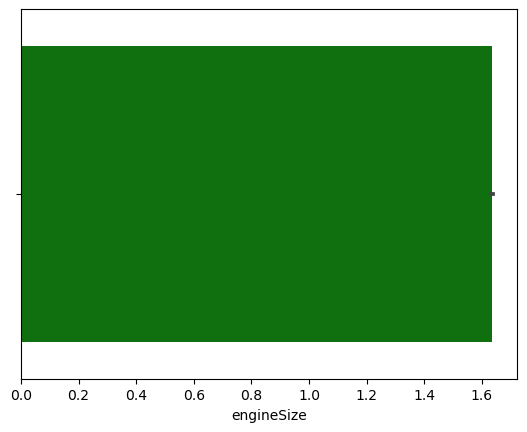

In [20]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.barplot(x=df[i],color="GREEN")
        plt.show();

In [4]:
le=LabelEncoder()

In [5]:
df["transmission"]=le.fit_transform(df.transmission)
df["make"]=le.fit_transform(df.make)

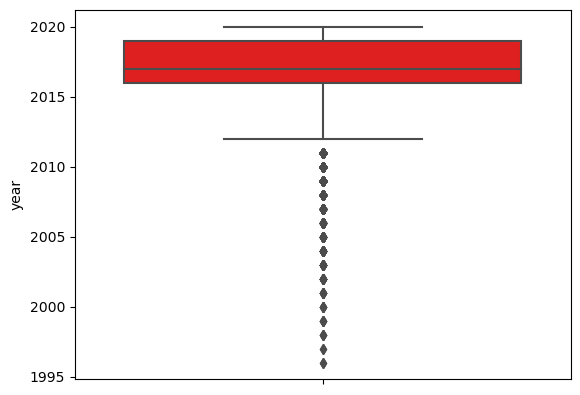

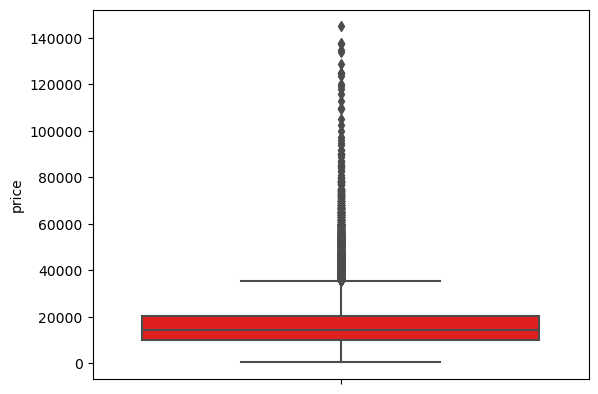

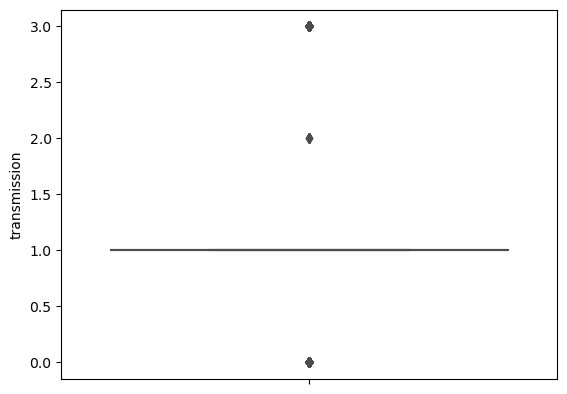

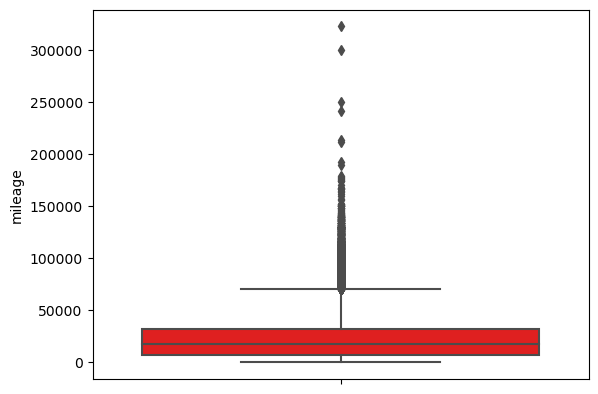

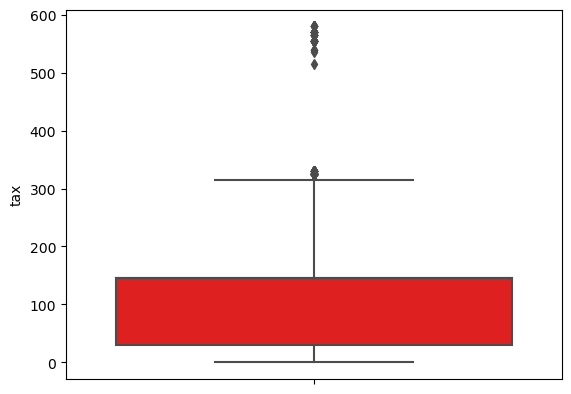

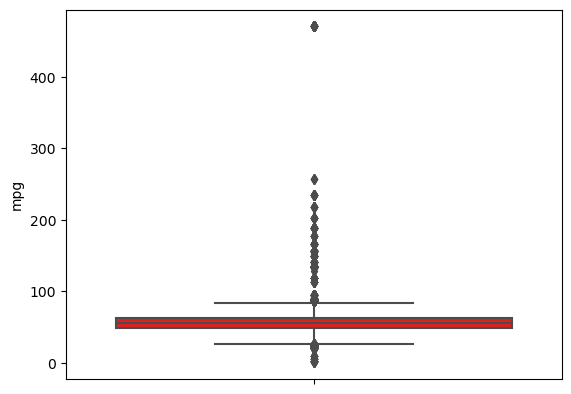

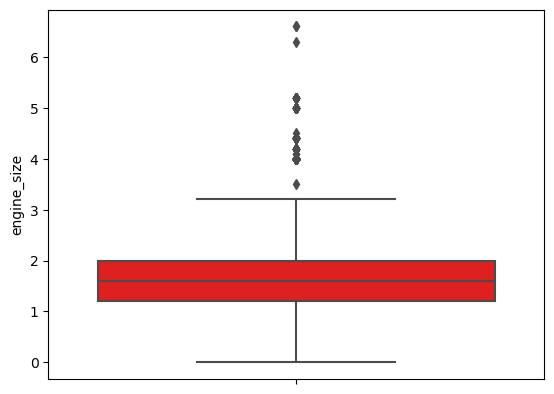

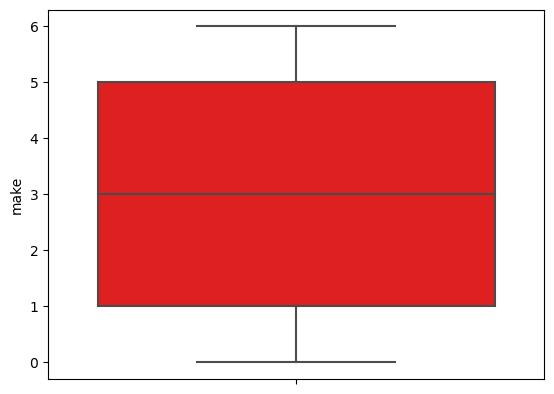

In [6]:
for i in df.columns:
    if df[i].dtype!="object":
            sns.boxplot(y=df[i],color="red")
            plt.show();

In [7]:
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [8]:
for column in df.columns:
    if df[column].dtype !="object":
        ul,ll=outlier(df[column])
        df[column]=np.where((df[column]>ul)|(df[column]<ll),np.nan,df[column])

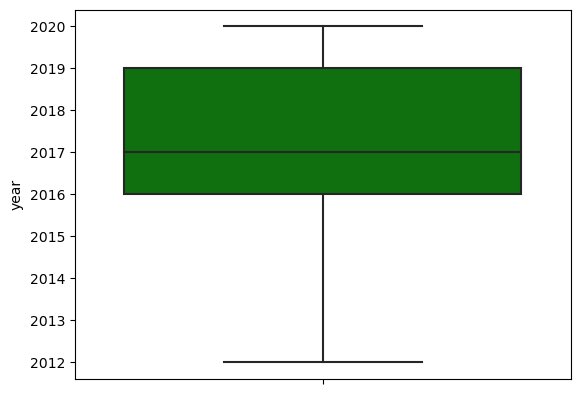

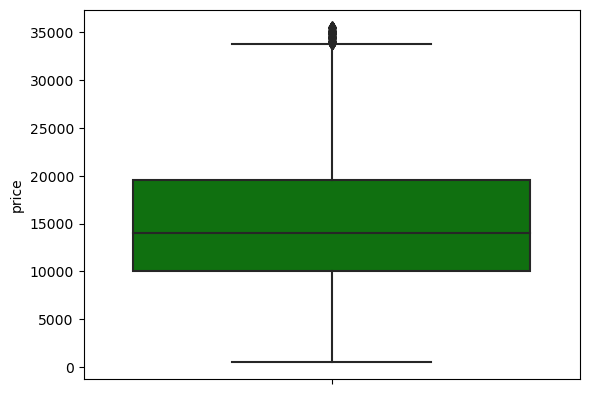

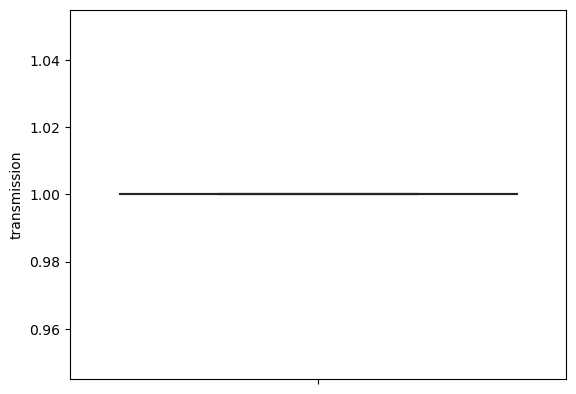

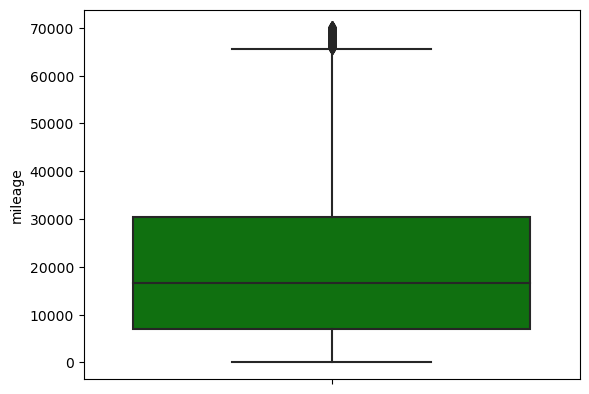

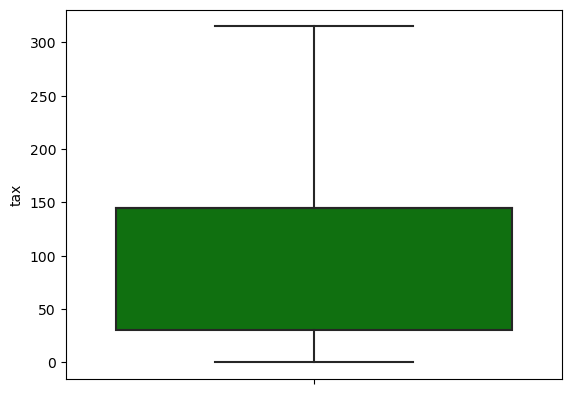

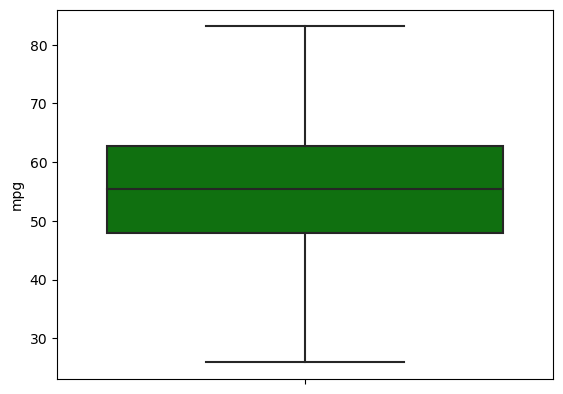

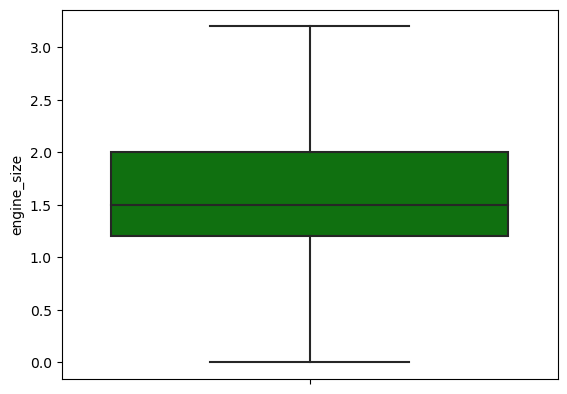

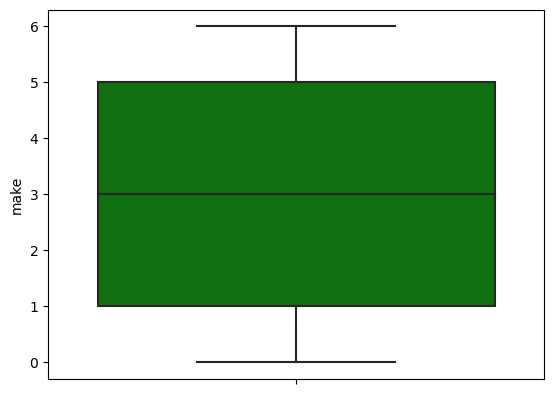

In [9]:
 for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

In [10]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40583 entries, 0 to 72433
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         40583 non-null  object 
 1   year          40583 non-null  float64
 2   price         40583 non-null  float64
 3   transmission  40583 non-null  float64
 4   mileage       40583 non-null  float64
 5   fuel_type     40583 non-null  object 
 6   tax           40583 non-null  float64
 7   mpg           40583 non-null  float64
 8   engine_size   40583 non-null  float64
 9   make          40583 non-null  float64
dtypes: float64(8), object(2)
memory usage: 3.4+ MB


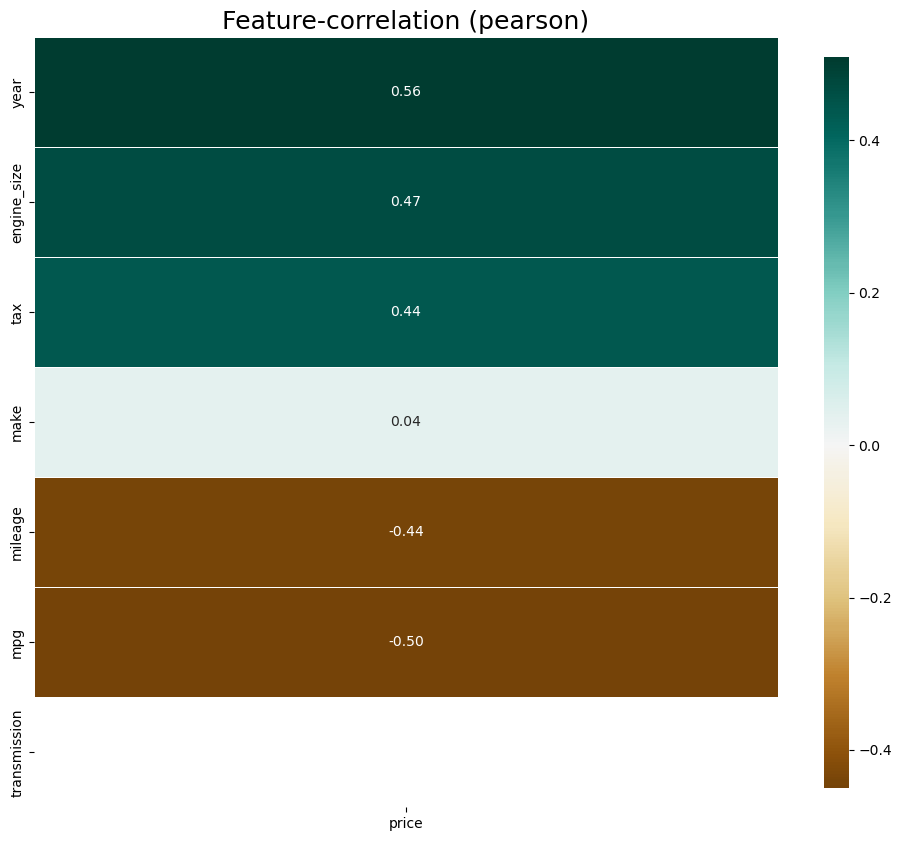

In [15]:
k.corr_plot(data=df,target="price");

In [16]:
x=df[["year","engine_size","tax"]].values
y=df[["price"]].values

In [17]:
sc=StandardScaler()

In [18]:
x=sc.fit_transform(x)

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [20]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  3026.0942452056283
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  3026.076856576208
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3026.09331586237
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2769.6170432433833
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  2760.9216641960356
****************************************************************************************************


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
model=RandomForestRegressor()

In [23]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [25]:
print("model trained with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
score = r2_score(y_test, model.predict(x_test))*100
mae = mean_absolute_error(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with RandomForestRegressor()
r2score:  71.80357961040247
training_score:  73.31098316558293
testing_score:  71.80357961040247
mae:  1945.5228774897096
mse:  6834217.342609081
rmse_test:  2614.233605209963


In [26]:
y_pred=model.predict(x)
y_pred

array([14687.3943245 , 12692.45898528, 14185.69013003, ...,
        9939.50266467,  9160.65335227, 14792.03772412])

In [27]:
op=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
op

,ACTUAL,PREDICTED
0,12500.0,14687.394324
1,11000.0,12692.458985
2,17300.0,14185.690130
3,10200.0,11049.004645
4,12000.0,12692.458985
...,...,...
40578,12495.0,12093.605814
40579,8680.0,10592.111718
40580,7830.0,9939.502665
40581,6830.0,9160.653352


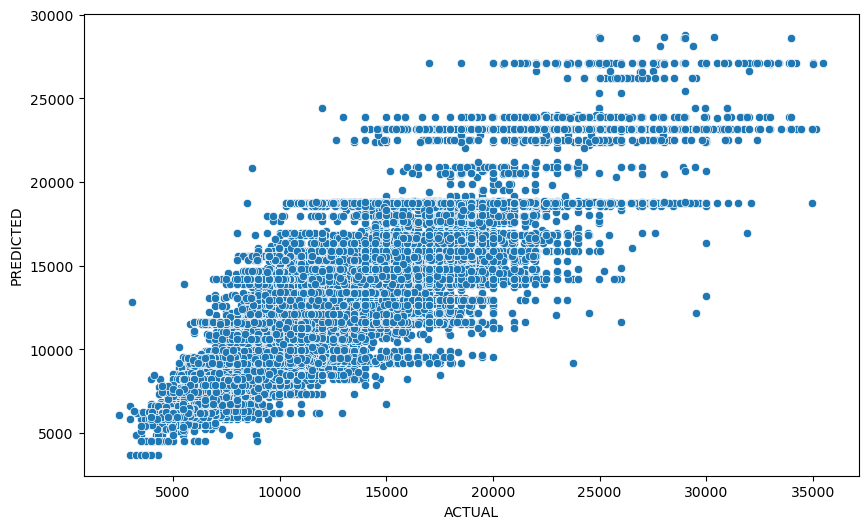

In [28]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

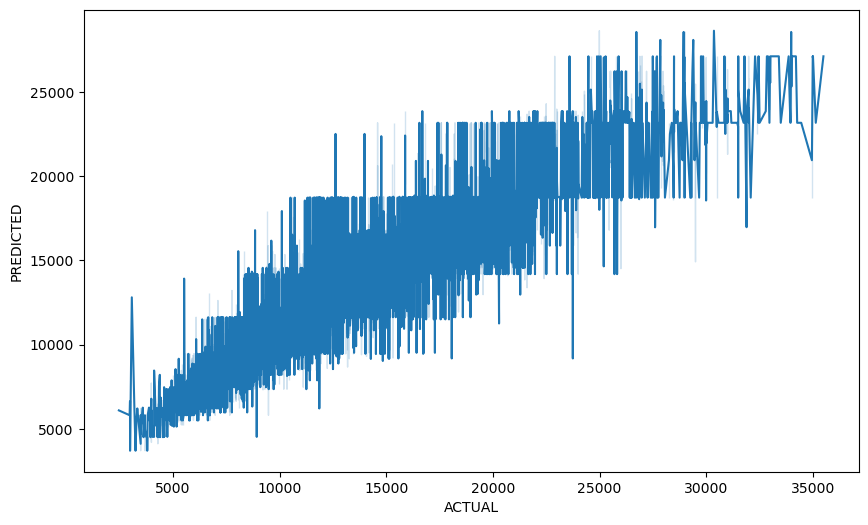

In [29]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();